<a href="https://colab.research.google.com/github/bssudheer/DAMT_Project/blob/main/Sandbox_instance_DAMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import os

In [2]:
# Loading data
for dirname, _, filenames in os.walk('/content/NVDA.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/content/NVDA.csv')

In [3]:
# Visualize the data
fig = px.line(data, x='Date', y='Close', title='Close Price')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.update_xaxes(tickangle=-60)
fig.show()

In [4]:
# Feature scaling for LSTM
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
data['Close_scaled_lstm'] = scaler_lstm.fit_transform(data['Close'].values.reshape(-1, 1))

In [5]:
# Prepare the data for LSTM
X_lstm = []
y_lstm = []

for i in range(60, len(data)):
    X_lstm.append(data['Close_scaled_lstm'].values[i-60:i])
    y_lstm.append(data['Close_scaled_lstm'].values[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

In [6]:
# Reshape data for LSTM
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

In [7]:
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the LSTM model
hist_lstm = model_lstm.fit(X_lstm, y_lstm, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
38/38 - 28s - loss: 0.0154 - 28s/epoch - 725ms/step
Epoch 2/20
38/38 - 11s - loss: 0.0038 - 11s/epoch - 292ms/step
Epoch 3/20
38/38 - 8s - loss: 0.0029 - 8s/epoch - 222ms/step
Epoch 4/20
38/38 - 10s - loss: 0.0026 - 10s/epoch - 263ms/step
Epoch 5/20
38/38 - 11s - loss: 0.0025 - 11s/epoch - 280ms/step
Epoch 6/20
38/38 - 8s - loss: 0.0037 - 8s/epoch - 216ms/step
Epoch 7/20
38/38 - 10s - loss: 0.0022 - 10s/epoch - 264ms/step
Epoch 8/20
38/38 - 9s - loss: 0.0028 - 9s/epoch - 246ms/step
Epoch 9/20
38/38 - 8s - loss: 0.0026 - 8s/epoch - 212ms/step
Epoch 10/20
38/38 - 9s - loss: 0.0024 - 9s/epoch - 247ms/step
Epoch 11/20
38/38 - 9s - loss: 0.0017 - 9s/epoch - 234ms/step
Epoch 12/20
38/38 - 23s - loss: 0.0017 - 23s/epoch - 618ms/step
Epoch 13/20
38/38 - 8s - loss: 0.0022 - 8s/epoch - 206ms/step
Epoch 14/20
38/38 - 9s - loss: 0.0015 - 9s/epoch - 238ms/step
Epoch 15/20
38/38 - 13s - loss: 0.0017 - 13s/epoch - 351ms/step
Epoch 16/20
38/38 - 8s - loss: 0.0017 - 8s/epoch - 214ms/step
Epo

In [9]:
# Feature scaling for CNN
scaler_cnn = MinMaxScaler(feature_range=(0, 1))
data['Close_scaled_cnn'] = scaler_cnn.fit_transform(data['Close'].values.reshape(-1, 1))

In [10]:
# Prepare the data for CNN
X_cnn = []
y_cnn = []

for i in range(60, len(data)):
    X_cnn.append(data['Close_scaled_cnn'].values[i-60:i])
    y_cnn.append(data['Close_scaled_cnn'].values[i])

X_cnn, y_cnn = np.array(X_cnn), np.array(y_cnn)

In [11]:
# Reshape data for CNN
X_cnn = X_cnn.reshape(X_cnn.shape[0], X_cnn.shape[1], 1)

In [12]:
# CNN Model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(60, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(units=50, activation='relu'))
model_cnn.add(Dense(units=1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the CNN model
hist_cnn = model_cnn.fit(X_cnn, y_cnn, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
38/38 - 1s - loss: 0.0153 - 1s/epoch - 33ms/step
Epoch 2/20
38/38 - 0s - loss: 0.0033 - 252ms/epoch - 7ms/step
Epoch 3/20
38/38 - 0s - loss: 0.0018 - 253ms/epoch - 7ms/step
Epoch 4/20
38/38 - 0s - loss: 0.0015 - 240ms/epoch - 6ms/step
Epoch 5/20
38/38 - 0s - loss: 0.0013 - 240ms/epoch - 6ms/step
Epoch 6/20
38/38 - 0s - loss: 0.0018 - 238ms/epoch - 6ms/step
Epoch 7/20
38/38 - 0s - loss: 0.0011 - 232ms/epoch - 6ms/step
Epoch 8/20
38/38 - 0s - loss: 0.0010 - 237ms/epoch - 6ms/step
Epoch 9/20
38/38 - 0s - loss: 0.0011 - 234ms/epoch - 6ms/step
Epoch 10/20
38/38 - 0s - loss: 0.0013 - 249ms/epoch - 7ms/step
Epoch 11/20
38/38 - 0s - loss: 0.0012 - 230ms/epoch - 6ms/step
Epoch 12/20
38/38 - 0s - loss: 7.8302e-04 - 234ms/epoch - 6ms/step
Epoch 13/20
38/38 - 0s - loss: 7.5813e-04 - 215ms/epoch - 6ms/step
Epoch 14/20
38/38 - 0s - loss: 6.5233e-04 - 219ms/epoch - 6ms/step
Epoch 15/20
38/38 - 0s - loss: 6.2595e-04 - 220ms/epoch - 6ms/step
Epoch 16/20
38/38 - 0s - loss: 6.9456e-04 - 246ms/

In [14]:
# Combine LSTM and CNN predictions
testData = pd.read_csv('/content/NVDA.csv')
testData['Close'] = pd.to_numeric(testData['Close'], errors='coerce')
testData = testData.dropna()
testData['Close_scaled_lstm'] = scaler_lstm.transform(testData['Close'].values.reshape(-1, 1))
testData['Close_scaled_cnn'] = scaler_cnn.transform(testData['Close'].values.reshape(-1, 1))

X_test_lstm = []
X_test_cnn = []

for i in range(60, len(testData)):
    X_test_lstm.append(testData['Close_scaled_lstm'].values[i-60:i])
    X_test_cnn.append(testData['Close_scaled_cnn'].values[i-60:i])

X_test_lstm, X_test_cnn = np.array(X_test_lstm), np.array(X_test_cnn)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_cnn = model_cnn.predict(X_test_cnn)

predicted_price_lstm = scaler_lstm.inverse_transform(y_pred_lstm)
predicted_price_cnn = scaler_cnn.inverse_transform(y_pred_cnn)

38/38 [==============================] - 0s 3ms/step


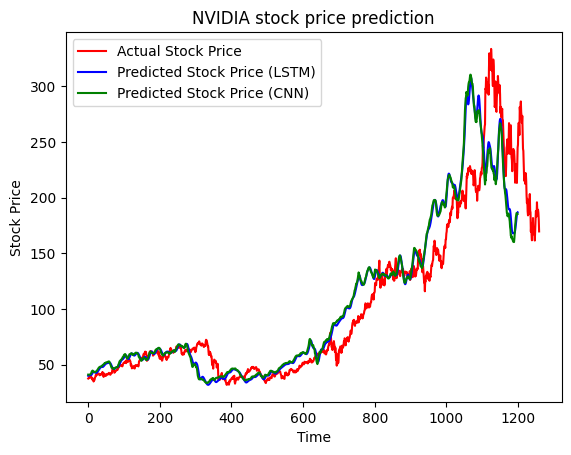

In [27]:
# Plot the results
plt.plot(testData['Close'], color='red', label='Actual Stock Price')
plt.plot(predicted_price_lstm, color='blue', label='Predicted Stock Price (LSTM)')
plt.plot(predicted_price_cnn, color='green', label='Predicted Stock Price (CNN)')
plt.title('NVIDIA stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()